In [52]:
#importing the modules used to analyze data
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
#reading the csv file 
health = pd.read_csv('health.csv')
health.head()

,cid,survey,wt20_dual,wt20_dual_q1,qxvers,mood1,mood2,mood3,mood4,mood5,...,sexaslttouch,sexasltrape,dvscreen,wt_compare,strata,strata_q1,bthcntrltype19,insure19r,hhsize,child
0,2000001,20,1014.111405,1298.712123,1,5,5,5,5,4,...,2.0,2.0,2.0,1014.111405,20191402,20191402.0,NaN,1.0,2,2.0
1,2000002,20,60.653305,147.643223,1,5,3,3,3,3,...,2.0,2.0,2.0,60.653305,20191309,20191309.0,NaN,3.0,1,2.0
2,2000003,20,75.367704,108.963691,1,5,4,5,5,5,...,2.0,2.0,2.0,75.367704,20191402,20191402.0,NaN,3.0,1,2.0
3,2000004,20,1015.285504,NaN,2,5,4,5,5,3,...,2.0,2.0,2.0,1015.285504,20199399,NaN,NaN,1.0,3,1.0
4,2000005,20,223.768505,387.054275,1,5,5,5,5,5,...,2.0,2.0,2.0,223.768505,20191207,20191207.0,NaN,NaN,1,2.0


In [54]:
#how much data
health.shape

(8253, 152)

In [55]:
#grabbing columns from data set
columns_we_want = [ "insuredgateway19","generalhealth", "visitnonpcp12m19", "pcp19","didntgetcare19","emp3", "insure5","birthsex","imputed_neighpovgroup4_1418", "fluvaccineshot","everhepavaccine","fruitveg19"]
health[columns_we_want]
health = health[columns_we_want]


In [56]:
#renaming columns
health = health.rename(columns = {'insuredgateway19' : 'insured', 'visitnonpcp12m19' : 'seen_a_doctor_in_12months?', 'pcp19' : 'primary_doctor', 'insure5': 'who_insures_you','emp3': 'employed', 'imputed_neighpovgroup4_1418': 'below_poverty','fruitveg19':'fruit_veggie_servings','everhepavaccine': 'revieved_hepatatis_vaccine','didntgetcare19': 'didnt_get_care'})
health.head()

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,2,1.0,3.0,2.0
1,1.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,2,2.0,2.0,1.0
2,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2,1.0,3.0,2.0
3,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3,2.0,2.0,2.0
4,1.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,4,2.0,2.0,2.0


In [57]:
# describing the basics of the numerical data using the describe varaibles
health.describe()

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
count,8213.000000,8227.000000,8238.000000,8207.000000,8205.000000,8172.000000,8026.000000,8224.000000,8253.000000,8178.000000,8243.000000,8028.000000
mean,1.094241,2.696973,1.127337,1.139515,1.880073,1.778512,2.172315,1.561527,2.389192,1.492541,1.823972,2.051570
std,0.292181,1.121782,0.333370,0.346504,0.324896,0.943068,1.302893,0.496230,0.937318,0.499975,0.720247,0.492456
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,2.000000,5.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000,4.000000,2.000000,3.000000,3.000000


In [1]:
#Renaming data points in below_poverty and other columns I am preforming analysis on so that the data is understandable to the user. 
health_copy1 = health.copy()
health_copy1.loc[health_copy1.below_poverty == 1, "below_poverty"] = "0 - <10% (low pov)%"
health_copy1.loc[health_copy1.below_poverty == 2, "below_poverty"] = "10 - <20%"
health_copy1.loc[health_copy1.below_poverty == 3, "below_poverty"] = "20 - <30%"
health_copy1.loc[health_copy1.below_poverty == 4, "below_poverty"] = "30 - <100% (very high)"

health_copy1.loc[health_copy1.insured == 1, "insured"] = "yes"
health_copy1.loc[health_copy1.insured == 2, "insured"] = "no"

health_copy1.loc[health_copy1.primary_doctor == 1, "primary_doctor"] = "yes"
health_copy1.loc[health_copy1.primary_doctor == 2, "primary_doctor"] = "no"

health_copy1.loc[health_copy1.didnt_get_care == 1, "didnt_get_care"] = "yes"
health_copy1.loc[health_copy1.didnt_get_care == 2, "didnt_get_care"] = "no"

health_copy1.loc[health_copy1.below_poverty == 1, "below_poverty"] = "0 - <10% (low pov)%"
health_copy1.loc[health_copy1.below_poverty == 2, "below_poverty"] = "10 - <20%"
health_copy1.loc[health_copy1.below_poverty == 3, "below_poverty"] = "20 - <30%"
health_copy1.loc[health_copy1.below_poverty == 4, "below_poverty"] = "30 - <100% (very high)"


print(health_copy1.head())


NameError: name 'health' is not defined

Text(0.5, 1.0, 'distribution of residents living in specific income neighborhoods')

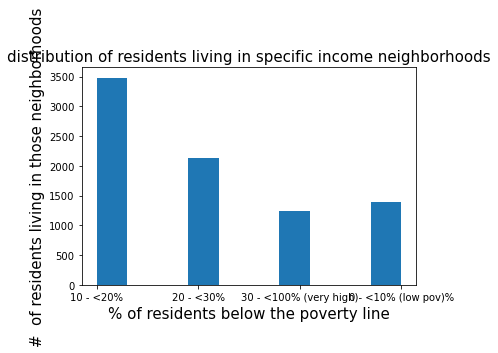

In [70]:
plt.hist(health_copy1['below_poverty'])
plt.xlabel('% of residents below the poverty line',fontsize=15)
plt.ylabel("#  of residents living in those neighborhoods",fontsize=15)
plt.title('distribution of residents living in specific income neighborhoods',fontsize=15)

In [60]:
group_poverty = health_copy1.groupby('below_poverty').insured
insured_poverty= group_poverty.value_counts(normalize=True)*100
print(insured_poverty)

below_poverty           insured
0 - <10% (low pov)%     yes        94.408602
                        no          5.591398
10 - <20%               yes        91.601732
                        no          8.398268
20 - <30%               yes        88.568729
                        no         11.431271
30 - <100% (very high)  yes        86.812298
                        no         13.187702
Name: insured, dtype: float64


This analysis shows that as the below poverty percentage increases (more people in that neighborhood are living in poverity) then the percent of people insured decreases. As the number of people in poverty increases, the percent of those with insurance decreases by about an increment of about 3% each time. This creates an approximate 8% differnce in those insured in the neighborhoods with the lowest poverty rate to the highest.

In [61]:
group_poverty2 = health-.groupby('below_poverty').primary_doctor
dr_poverty = group_poverty2.value_counts(normalize=True)*100
print(dr_poverty)

below_poverty           primary_doctor
0 - <10% (low pov)%     yes               89.892473
                        no                10.107527
10 - <20%               yes               86.506790
                        no                13.493210
20 - <30%               yes               84.615385
                        no                15.384615
30 - <100% (very high)  yes               82.873377
                        no                17.126623
Name: primary_doctor, dtype: float64


In [65]:
group_poverty3 = health_copy1.groupby('below_poverty').didnt_get_care
didnt_poverty = group_poverty3.value_counts(normalize=True)*100
print(didnt_poverty)

below_poverty           didnt_get_care
0 - <10% (low pov)%     no                90.021536
                        yes                9.978464
10 - <20%               no                88.940225
                        yes               11.059775
20 - <30%               no                87.269285
                        yes               12.730715
30 - <100% (very high)  no                84.385113
                        yes               15.614887
Name: didnt_get_care, dtype: float64


(array([3486.,    0., 1599.,    0.,    0., 1838.,    0.,  278.,    0.,
         825.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

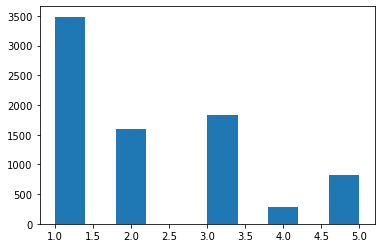

In [71]:
# i want to make a group by so i can see the distribution of what insuraunce each neighborhood has 
plt.hist(health_copy1['who_insures_you'])
#plt.xlabel('% of residents below the poverty line',fontsize=15)
#plt.ylabel("#  of residents living in those neighborhoods",fontsize=15)
#plt.title('distribution of residents living in specific income neighborhoods',fontsize=15)

Data Limitations:
The data in the health survery is all categorial data that is represented by numerical values. While some computations can be peformed on the data, this data set is best used in calulating percentages and showing distribution. When trying to show correlation in a scatterplot the results are inconclusive becasue there are only x amount of categories that the population can fall into. 

Data explanation: 
This data set is created from a survery given to indivuals in NYC. The data set explores the general health of these residents as well other demographics such as income, gender, etc. The data is all categorical, but is represented as numbers in the dataset. In the finalized data sets we can see how poverty levels in NYC neighborhoods affect an indivuals access to healthcare. The data set can show this relationship by comparing the % of people below poverty in a specific neighborhood to the number of people insured, the number of people who have a regular doctor, and accessiblitiy to needed care. Additionally, this data set can begin to explore access to nutitious foods and vaccinations; however, there may be outside factors that also influence these demograohics that may not be directly seen through income levels.
NOTE: This data set is currently incomplete and we are attempting to get access to boroughs and other demographic information that is not for publce use